# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape    #returns no of rows and columns

(25, 2)

# visualization of dataset

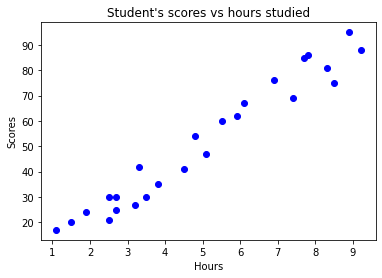

In [4]:
plt.scatter(x=data['Hours'],y=data['Scores'],color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Student's scores vs hours studied")
plt.show()

In [5]:
data.info()                         #since all values are not null that means thier is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
q1=data['Scores'].quantile(.25)

In [7]:
q3=data['Scores'].quantile(.75)

In [8]:
iqr=q3-q1   #inter quaetile range(diff bw 75% & 25%)

In [9]:
iqr

45.0

In [10]:
l=q1-1.5*iqr
u=q3+1.5*iqr

In [11]:
l,u

(-37.5, 142.5)

# checking for outliers

In [12]:
data['Scores'].min()  #min value is greater then upper limit therefore no outlier

17

In [13]:
data['Scores'].max() #max value is less then upper limit therefore no outlier

95

In [14]:
from sklearn.model_selection import train_test_split #it is used to split data

In [15]:
X=data.drop(columns=['Scores'])
Y=data['Scores']


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [17]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17, 1), (8, 1), (17,), (8,))

# using linear regression algorithm on test & train set

In [18]:
from sklearn.linear_model import LinearRegression  #IMPORTING linear regression class from linear_model of sklearn lib.
lr=LinearRegression(normalize=True)  #normalize the data to bring all variable to same range
lr.fit(X_train,Y_train)    #to find best fit parameter(slope,intercept) to model the data

LinearRegression(normalize=True)

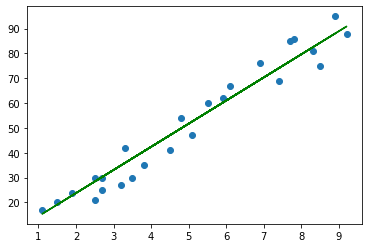

In [19]:
line=lr.coef_*X + lr.intercept_
plt.scatter(X,Y)
plt.plot(X,line,color='green')


In [20]:
pred=lr.predict(X_test)

In [21]:
df=pd.DataFrame({'Actual':Y_test,'Prediction':pred})

# evaluation metrics

checking whether simple mean prediction model is better than linear regression model

In [22]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred,Y_test)
mae

4.812819328187851

In [23]:
data['mean_score']=data['Scores'].mean()

In [24]:
y=data['Scores']
y_mean=data['mean_score']
y_mean_mae=mean_absolute_error(y_mean,y)
y_mean_mae

22.4192

# now checking the score of student when students studies for  9.25 hrs

In [25]:
n=float(input("Enter no of hours="))
test_hours=[[n]]
prediction=lr.predict(test_hours)
print("No of Hours={}".format(test_hours))
print("Student's Score={}".format(prediction[0]))

Enter no of hours=9.25
No of Hours=[[9.25]]
Student's Score=91.35311582780736
